In [48]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [90]:
xdf = pd.read_csv("/srv/sync/cpj/IND/data/train/train_features.csv")
ydf = pd.read_csv("/srv/sync/cpj/IND/data/train/train_salaries.csv")
cat_feat = ["companyId","jobType","degree","major","industry"]
num_feat = ["yearsExperience", "milesFromMetropolis"]
for c in cat_feat:
    xdf[c] = pd.factorize(xdf[c])[0]
xdf

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,0,0,0,0,0,10,83
1,JOB1362684407688,1,1,1,1,1,3,73
2,JOB1362684407689,2,2,2,2,0,10,38
3,JOB1362684407690,3,3,2,3,2,8,17
4,JOB1362684407691,4,2,3,2,3,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,9,2,3,3,0,19,94
999996,JOB1362685407683,6,6,1,1,3,12,35
999997,JOB1362685407684,45,4,1,1,4,16,81
999998,JOB1362685407685,16,0,0,1,0,6,5


In [91]:
# Create a random dataset
features = cat_feat + num_feat
X = xdf.filter(features).to_numpy()
y = ydf.salary.to_numpy()
x_train, y_train = X[:-1000, :], y[:-1000]
x_test, y_test = X[-1000:, :], y[-1000:]
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=10)

In [92]:
X.shape

(1000000, 7)

In [93]:
regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)

/home/jcadic/anaconda3/envs/indeed/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


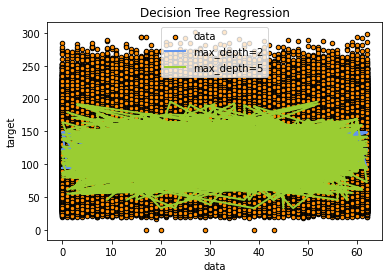

In [94]:
# Plot the results
plt.figure()
plt.scatter(X[:, 0], y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test[:, 0], y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test[:, 0], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [97]:
np.mean(y_2-y_test), np.std(y_2-y_test)

(1.1477682633798565, 21.916827272445715)

In [46]:
assert np.min(ydf.jobId==xdf.jobId)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,0,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,1,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,9,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94
999996,JOB1362685407683,6,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35
999997,JOB1362685407684,45,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81
999998,JOB1362685407685,16,CFO,MASTERS,NONE,HEALTH,6,5


['milesFromMetropolis', 'jobType', 'industry', 'yearsExperience']